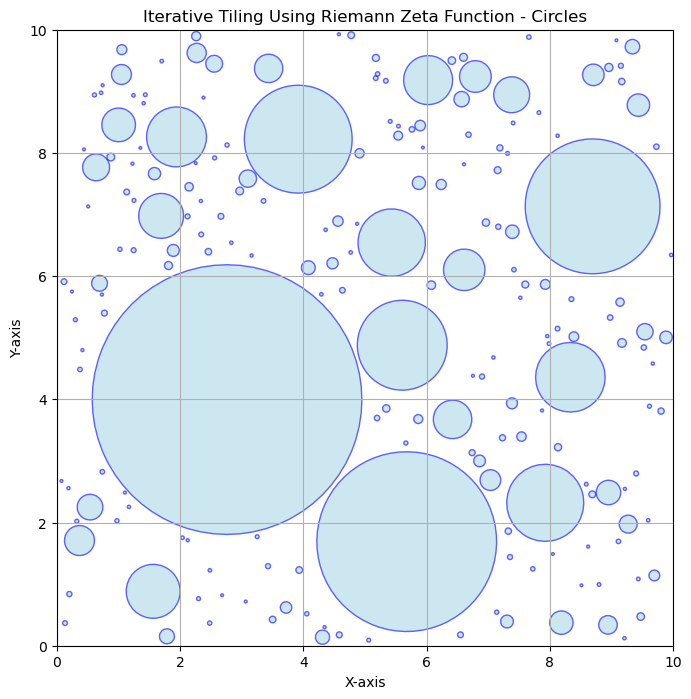

interactive(children=(Dropdown(description='Shape Type', options=('Circle', 'Square', 'Triangle'), value='Circ…

<function __main__.interactive_tiling(shape_type, A_plane, A0, p, n_shapes, max_particle_size, random_orientation)>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.special import zeta
import random
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown, Checkbox

# Function to generate the tiling
def generate_tiling(
    shape_type='Circle',
    A_plane=100.0,
    A0=2,
    p=1.2,
    n_shapes=200000,
    max_particle_size=15.0,
    random_orientation=True
):
    # Calculate c using the Riemann zeta function
    zeta_p = zeta(p)
    c = A0 * zeta_p / (A_plane - A0)
    
    # Generate areas for each shape
    areas = [A0]
    i = 1
    while len(areas) < n_shapes:
        area = A0 / ((i**p) * c)
        if area <= 0 or np.sqrt(area) > max_particle_size:
            i += 1
            continue
        areas.append(area)
        i += 1

    # Compute dimensions of the shapes
    if shape_type == 'Circle':
        sizes = [np.sqrt(area / np.pi) for area in areas]  # Radii
    else:
        sizes = [np.sqrt(area) for area in areas]  # Side lengths for squares and triangles

    # Define the plane dimensions (square)
    L = np.sqrt(A_plane)  # Length of the side of the square plane

    # Initialize list to store positions and sizes of the shapes
    positions = []

    # Function to check if a new shape overlaps with existing ones
    def is_overlapping(x_new, y_new, size_new, positions):
        for x, y, size, angle in positions:
            if shape_type == 'Circle':
                distance = np.hypot(x_new - x, y_new - y)
                if distance < (size_new + size):
                    return True
            else:
                # Approximate the shapes with circles for overlap checking
                distance = np.hypot(x_new - x, y_new - y)
                radius_new = size_new * np.sqrt(2) / 2
                radius = size * np.sqrt(2) / 2
                if distance < (radius_new + radius):
                    return True
        return False

    # Place the shapes randomly without overlapping
    for size in sizes:
        max_attempts = 1000
        for attempt in range(max_attempts):
            # Generate random position within the plane, ensuring the shape stays within bounds
            x = random.uniform(size, L - size)
            y = random.uniform(size, L - size)
            angle = random.uniform(0, 360) if random_orientation else 0
            # Check for overlap
            if not is_overlapping(x, y, size, positions):
                positions.append((x, y, size, angle))
                break
        else:
            print(f"Could not place a shape of size {size} without overlap after {max_attempts} attempts.")
            break

    # Plot the shapes
    fig, ax = plt.subplots(figsize=(8, 8))
    for x, y, size, angle in positions:
        if shape_type == 'Circle':
            shape = plt.Circle((x, y), size, edgecolor='blue', facecolor='lightblue', alpha=0.6)
        elif shape_type == 'Square':
            shape = patches.Rectangle(
                (x - size / 2, y - size / 2),
                size,
                size,
                angle=angle,
                edgecolor='green',
                facecolor='lightgreen',
                alpha=0.6
            )
        elif shape_type == 'Triangle':
            # Equilateral triangle
            h = size * np.sqrt(3) / 2
            points = np.array([
                [x, y + 2 * h / 3],
                [x - size / 2, y - h / 3],
                [x + size / 2, y - h / 3]
            ])
            t = patches.Polygon(
                points,
                closed=True,
                edgecolor='red',
                facecolor='salmon',
                alpha=0.6
            )
            shape = t
            shape.set_transform(
                plt.matplotlib.transforms.Affine2D().rotate_deg_around(x, y, angle) + ax.transData
            )
        else:
            continue

        if shape_type in ['Circle', 'Square']:
            shape.set_transform(
                plt.matplotlib.transforms.Affine2D().rotate_deg_around(x, y, angle) + ax.transData
            )
            ax.add_patch(shape)
        elif shape_type == 'Triangle':
            ax.add_patch(shape)

    # Set plot parameters
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect('equal', 'box')
    ax.set_title(f'Iterative Tiling Using Riemann Zeta Function - {shape_type}s')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    plt.grid(True)
    plt.show()

# Interactive widget function
def interactive_tiling(
    shape_type,
    A_plane,
    A0,
    p,
    n_shapes,
    max_particle_size,
    random_orientation
):
    generate_tiling(
        shape_type=shape_type,
        A_plane=A_plane,
        A0=A0,
        p=p,
        n_shapes=n_shapes,
        max_particle_size=max_particle_size,
        random_orientation=random_orientation
    )

# Create interactive sliders and dropdowns
interact(
    interactive_tiling,
    shape_type=Dropdown(options=['Circle', 'Square', 'Triangle'], value='Circle', description='Shape Type'),
    A_plane=FloatSlider(value=100.0, min=50.0, max=500.0, step=10.0, description='Plane Area'),
    A0=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Initial Area A0'),
    p=FloatSlider(value=2.0, min=1.1, max=5.0, step=0.1, description='Exponent p'),
    n_shapes=IntSlider(value=200, min=50, max=1000, step=50, description='Number of Shapes'),
    max_particle_size=FloatSlider(value=5.0, min=0.5, max=20.0, step=0.5, description='Max Particle Size'),
    random_orientation=Checkbox(value=True, description='Random Orientation')
)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.special import zeta
import random
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown, Checkbox


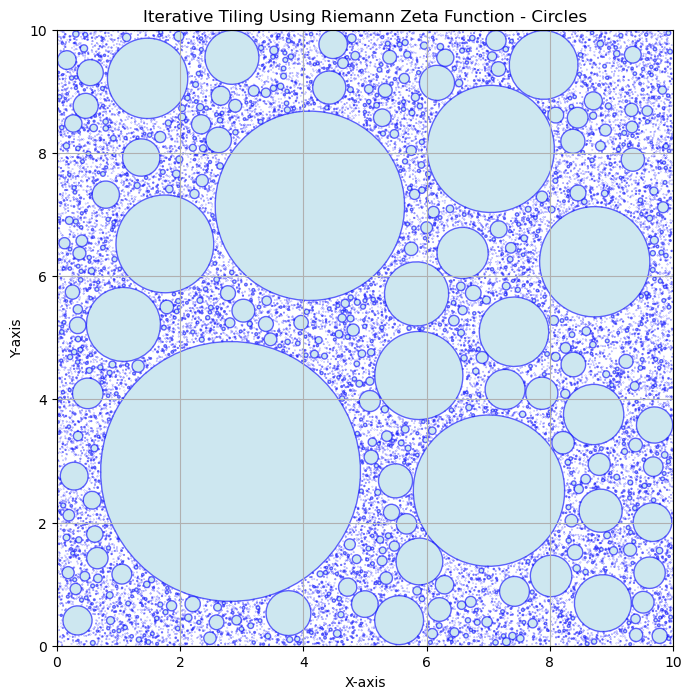

interactive(children=(Dropdown(description='Shape Type', options=('Circle', 'Square', 'Triangle'), value='Circ…

<function __main__.interactive_tiling(shape_type, A_plane, A0, p, n_shapes, max_particle_size, random_orientation)>

In [8]:

# Function to generate the tiling
def generate_tiling(
    shape_type='Circle',
    A_plane=100.0,
    A0=1.0,
    p=2.0,
    n_shapes=200,
    max_particle_size=5.0,
    random_orientation=True
):
    # Calculate c using the Riemann zeta function
    zeta_p = zeta(p)
    c = A0 * zeta_p / (A_plane - A0)
    
    # Generate areas for each shape
    areas = [A0]
    i = 1
    while len(areas) < n_shapes:
        area = A0 / ((i**p) * c)
        if area <= 0 or np.sqrt(area) > max_particle_size:
            i += 1
            continue
        areas.append(area)
        i += 1

    # Compute dimensions of the shapes
    if shape_type == 'Circle':
        sizes = [np.sqrt(area / np.pi) for area in areas]  # Radii
    else:
        sizes = [np.sqrt(area) for area in areas]  # Side lengths for squares and triangles

    # Define the plane dimensions (square)
    L = np.sqrt(A_plane)  # Length of the side of the square plane

    # Initialize list to store positions and sizes of the shapes
    positions = []

    # Function to check if a new shape overlaps with existing ones
    def is_overlapping(x_new, y_new, size_new, positions):
        for x, y, size, angle in positions:
            if shape_type == 'Circle':
                distance = np.hypot(x_new - x, y_new - y)
                if distance < (size_new + size):
                    return True
            else:
                # Approximate the shapes with circles for overlap checking
                distance = np.hypot(x_new - x, y_new - y)
                radius_new = size_new * np.sqrt(2) / 2
                radius = size * np.sqrt(2) / 2
                if distance < (radius_new + radius):
                    return True
        return False

    # Place the shapes randomly without overlapping
    for size in sizes:
        max_attempts = 1000
        for attempt in range(max_attempts):
            # Generate random position within the plane, ensuring the shape stays within bounds
            x = random.uniform(size, L - size)
            y = random.uniform(size, L - size)
            angle = random.uniform(0, 360) if random_orientation else 0
            # Check for overlap
            if not is_overlapping(x, y, size, positions):
                positions.append((x, y, size, angle))
                break
        else:
            print(f"Could not place a shape of size {size} without overlap after {max_attempts} attempts.")
            break

    # Plot the shapes
    fig, ax = plt.subplots(figsize=(8, 8))
    for x, y, size, angle in positions:
        if shape_type == 'Circle':
            shape = plt.Circle((x, y), size, edgecolor='blue', facecolor='lightblue', alpha=0.6)
        elif shape_type == 'Square':
            shape = patches.Rectangle(
                (x - size / 2, y - size / 2),
                size,
                size,
                angle=angle,
                edgecolor='green',
                facecolor='lightgreen',
                alpha=0.6
            )
        elif shape_type == 'Triangle':
            # Equilateral triangle
            h = size * np.sqrt(3) / 2
            points = np.array([
                [x, y + 2 * h / 3],
                [x - size / 2, y - h / 3],
                [x + size / 2, y - h / 3]
            ])
            t = patches.Polygon(
                points,
                closed=True,
                edgecolor='red',
                facecolor='salmon',
                alpha=0.6
            )
            shape = t
            shape.set_transform(
                plt.matplotlib.transforms.Affine2D().rotate_deg_around(x, y, angle) + ax.transData
            )
        else:
            continue

        if shape_type in ['Circle', 'Square']:
            shape.set_transform(
                plt.matplotlib.transforms.Affine2D().rotate_deg_around(x, y, angle) + ax.transData
            )
            ax.add_patch(shape)
        elif shape_type == 'Triangle':
            ax.add_patch(shape)

    # Set plot parameters
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect('equal', 'box')
    ax.set_title(f'Iterative Tiling Using Riemann Zeta Function - {shape_type}s')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    plt.grid(True)
    plt.show()

# Interactive widget function
def interactive_tiling(
    shape_type,
    A_plane,
    A0,
    p,
    n_shapes,
    max_particle_size,
    random_orientation
):
    generate_tiling(
        shape_type=shape_type,
        A_plane=A_plane,
        A0=A0,
        p=p,
        n_shapes=n_shapes,
        max_particle_size=max_particle_size,
        random_orientation=random_orientation
    )

# Create interactive sliders and dropdowns
interact(
    interactive_tiling,
    shape_type=Dropdown(options=['Circle', 'Square', 'Triangle'], value='Circle', description='Shape Type'),
    A_plane=FloatSlider(value=100.0, min=50.0, max=50000.0, step=100.0, description='Plane Area'),
    A0=FloatSlider(value=1.0, min=0.1, max=100.0, step=0.01, description='Initial Area A0'),
    p=FloatSlider(value=1.56, min=1.01, max=2.0, step=0.01, description='Exponent p'),
    n_shapes=IntSlider(value=20000, min=50, max=1000000, step=50, description='Number of Shapes'),
    max_particle_size=FloatSlider(value=5.0, min=0.5, max=20.0, step=0.5, description='Max Particle Size'),
    random_orientation=Checkbox(value=True, description='Random Orientation')
)
